# Electricity consumption by sector
This part of my final project focuses on the electricity consumption of each sector across the Sydney area of Australia.

## Importing programs
I will import the following programs below.

In [152]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text

import leafmap

## Topic
In this part of the final project, I will be focusing on the electricity consumption of sectors across the Sydney area of Australia. This page will feature datas and plots of the suburbs in the Sydney area of Australia. It will provide interesting facts such as the ```Data_Category``` of the sectors along with plots.

In [153]:
coords = (-33.867778, 151.21)
print(coords)

coords[0]

(-33.867778, 151.21)


-33.867778

## Creating spatial overlays
In this section, I will use what I learned in the geopandas assignment and create the spatial overlays for Australia.

### Importing the data
In this section, I will be importing data to clip the points for Australia. These data are imported from <a href="https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-populated-places/">this link</a> and <a href="https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/">this link</a>. I then filtered both and exported them as geojsons to focus on Australia.

In [154]:
countries = gpd.read_file('../data/ne_50m_admin_0_australia.geojson')
pop_places = gpd.read_file('../data/ne_50m_populated_places_australia.geojson')
states = gpd.read_file('../data/georef-australia-state-millesime.geojson')

In [155]:
# change default figsize
plt.rcParams['figure.figsize'] = (14, 8)

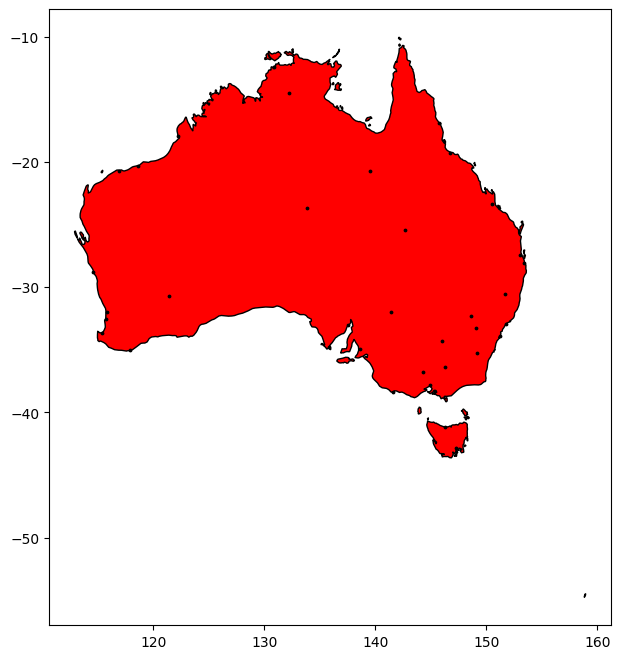

In [156]:
fig, ax = plt.subplots()

base_color = '#000000'
border_color = base_color
marker_color = '#000000'

countries.plot(ax=ax, edgecolor=border_color, color='#FF0000', zorder=1);
pop_places.plot(ax=ax, color=marker_color, markersize=3, zorder=2);

## Clipping points
In this section, I will clip the points for Australia.

### Setting up the plot
In this section, I will set up the plot for Australia.

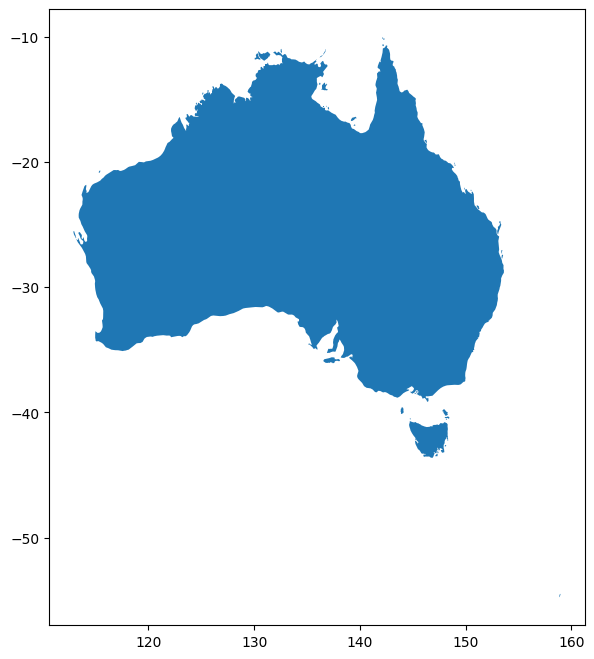

In [157]:
australia = countries.loc[countries['NAME'] == 'Australia']
australia.plot(); 

In [158]:
australia.geom_type.unique()

array(['MultiPolygon'], dtype=object)

In [159]:
# use unary_union to combine polygons into single
australia_poly = australia.geometry.unary_union

In [160]:
# create new GeoDataFrame of points that intersect with the clipping polygon
australia_places = pop_places[pop_places.geometry.intersects(australia_poly)]

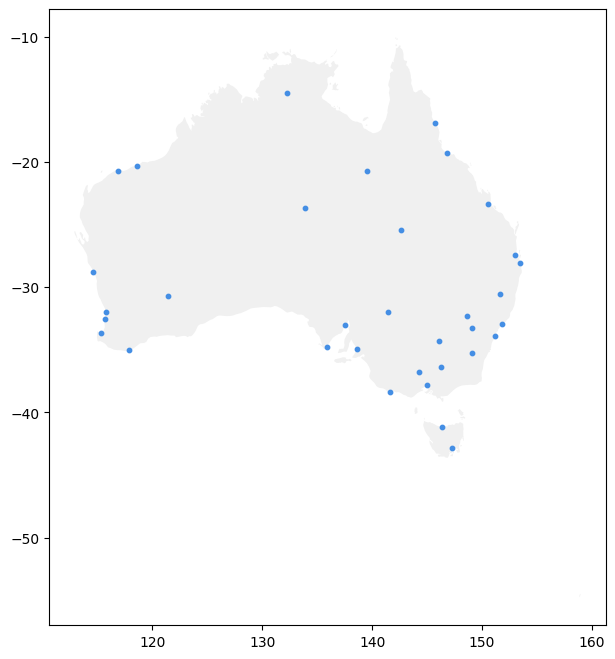

In [161]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

australia.plot(ax=ax, color=base_color, zorder=0);
australia_places.plot(ax=ax, color=marker_color, markersize=10, zorder=1);

### Clipping the points
This shows how I clipped the points of major cities in Australia.

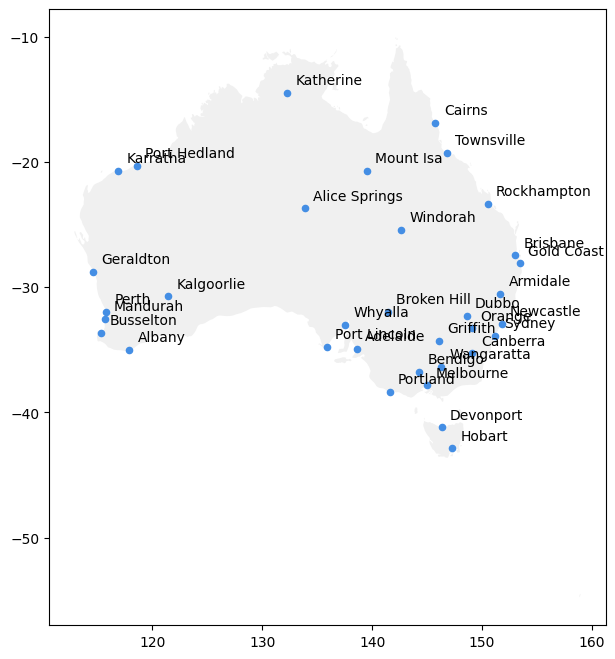

In [162]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

australia.plot(ax=ax, color=base_color, zorder=0);
australia_places.plot(ax=ax, color=marker_color, markersize=20, zorder=1);

australia_places.apply(lambda x: ax.annotate(text=x['NAME'],
                                  xy=x.geometry.coords[0],
                                  xytext=(6, 6),
                                  textcoords="offset points"),
                              axis=1);

In [163]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

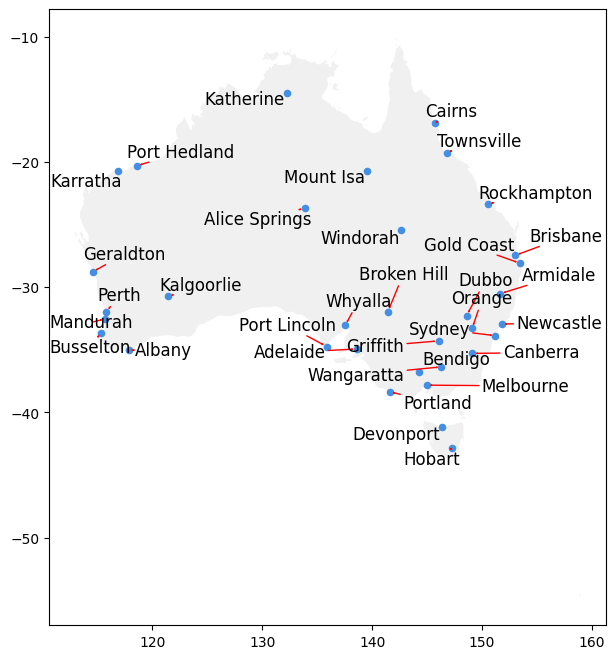

In [164]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

# Assuming 'australia' is your base GeoDataFrame for the country and 'australia_places' is for places
australia.plot(ax=ax, color=base_color, zorder=0)
australia_places.plot(ax=ax, color=marker_color, markersize=20, zorder=1)

texts = []
for x, row in australia_places.iterrows():
    # You might need to adjust 'xy' depending on your GeoDataFrame's structure
    point = row.geometry.centroid
    texts.append(ax.text(point.x, point.y, row['NAME'], fontsize=12, ha='right', va='center', color='black', zorder=2))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

## State raw file
This example will use what I learned in the `geopandas-101` assignment and apply Sydney for the `states_raw` feature.

In [ ]:
states_raw = gpd.read_file('../data/ne_10m_admin_1_states_provinces.csv')

In [ ]:
New_South_Wales = states_raw.loc[states_raw['name'] == 'New South Wales']
print('type_en: ', New_South_Wales.type_en)
print('region: ', New_South_Wales.region)
print('code_hasc: ', New_South_Wales.code_hasc)
print('admin: ', New_South_Wales.admin)
print('gn_name: ', New_South_Wales.gn_name)

## Using CSV data
I will use the stuff I learned from the pandas module and use CSV data. In this case, I will be using data that focuses on the electricity consumption of sectors that are located in Sydney by the type of data categories and the years. The link to the file is <a href="https://data.cityofsydney.nsw.gov.au/datasets/e2e2df91e18a4899ba6fd0618958f02d_0/explore">here</a>. It can also be found from <a href="https://data.cityofsydney.nsw.gov.au/pages/open-data">this link</a> as well, which consists of several open data pages. This will also involve the use of plot charts.

In [ ]:
electricity_consumption_df = pd.read_csv('../data/Electricity_consumption_by_sector.csv') 

In [ ]:
electricity_consumption_df.head()

In [ ]:
electricity_consumption_df.tail()

In [ ]:
electricity_consumption_df.info()

In [ ]:
electricity_consumption_df.describe()

In [ ]:
Data_Category  = electricity_consumption_df.groupby('Data_Category')['F2018_19'].mean().reset_index()
Data_Category

## Creating plots
This will show examples of plots I have created. The `F2018_19` will be used to represent the 2018-19 season, and `Data_Category` will be used to represent the data categories used for the plots.

### Bar plot
This example is a bar plot that represents the electricity consumption of sectors in Sydney, Australia. This is a horizontal bar plot, which is shown below. What I did was use `plt.barh()` to create it.

In [ ]:
# x-axis values 
Data_Category = electricity_consumption_df['Data_Category'].head(14)

# Y-axis values 
F2018_19 = electricity_consumption_df['F2018_19'].head(14)

plt.barh(Data_Category, F2018_19, color = "red")
plt.show()

### Scatter plot
This is a scatter plot that represents the electricity consumption of sectors in Sydney.

In [ ]:
# x-axis values 
F2018_19 = electricity_consumption_df['F2018_19'].head(14)

# Y-axis values 
Data_Category = electricity_consumption_df['Data_Category'].head(14)

# Function to plot scatter 
plt.scatter(F2018_19, Data_Category) 
 
# Adding Title
plt.title("Electricity Consumption By Sector")

# function to show the plot 
plt.show() 

### Line plot
This is a line plot that represents the electricity consumption of sectors in Sydney, Australia.

In [ ]:
# x-axis values 
F2018_19 = electricity_consumption_df['F2018_19'].head(14)

# Y-axis values 
Data_Category = electricity_consumption_df['Data_Category'].head(14)
 
# Function to plot 
plt.plot(F2018_19, Data_Category) 

# Adding Title
plt.title("Electricity Consumption By Sector")

# function to show the plot 
plt.show()

## Final conclusion
This section is the ending conclusion of the electricity consumption of sectors in Sydney, Australia. As we could see, the most amount of electricity consumption in 2018-19 is located between the `non-residential-community` and `non-residential-commercial office`, but that the `non-residential-commercial office` shows the most amount of electricity consumption in 2018-19 according to each plots, especially the scatter and bar plots. 